# Jamie's Phase 1 Project Work!
### hooray 

In [83]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
bomMovieGross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')

In [5]:
imdbNameBasics = pd.read_csv('zippedData/imdb.name.basics.csv.gz')

imdbTitleAkas = pd.read_csv('zippedData/imdb.title.akas.csv.gz')

imdbTitleBasics = pd.read_csv('zippedData/imdb.title.basics.csv.gz')

imdbTitleCrew = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

imdbTitlePrincipals = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

imdbTitleRatings = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')

In [6]:
rtMovieInfo = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

rtReviews = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='windows-1252')

tmdbMovies = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tnMovieBudgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [27]:
kaggle_movies = pd.read_csv('movies_metadata.csv', dtype={'genres':list})

TypeError: dtype '<class 'list'>' not understood

In [35]:
# Kaggle columns
import ast
# kaggle_movies['genres'] = kaggle_movies['genres'].apply(lambda x: ast.literal_eval(x))
# kaggle_movies['genres']



In [7]:
# get list of all columns in files
allFiles = [bomMovieGross, imdbNameBasics, imdbTitleBasics, imdbTitleAkas, imdbTitleCrew, imdbTitlePrincipals, imdbTitleRatings,
           rtMovieInfo, rtReviews, tmdbMovies, tnMovieBudgets]

allCols = list(map(lambda x: x.columns, allFiles))
allCols

[Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object'),
 Index(['nconst', 'primary_name', 'birth_year', 'death_year',
        'primary_profession', 'known_for_titles'],
       dtype='object'),
 Index(['tconst', 'primary_title', 'original_title', 'start_year',
        'runtime_minutes', 'genres'],
       dtype='object'),
 Index(['title_id', 'ordering', 'title', 'region', 'language', 'types',
        'attributes', 'is_original_title'],
       dtype='object'),
 Index(['tconst', 'directors', 'writers'], dtype='object'),
 Index(['tconst', 'ordering', 'nconst', 'category', 'job', 'characters'], dtype='object'),
 Index(['tconst', 'averagerating', 'numvotes'], dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
        'date'],
       dtype='object'),
 Index(['Unnamed: 0', 'genre_ids', 'id', 'origin

In [ ]:
# add producer/director column to first table

5782

In [8]:
tmdbMovies.drop('Unnamed: 0', axis=1, inplace=True)
# don't run again

In [13]:
#CHECK IF THERE ARE DUPLICATE MOVIES DUDE
tmdbMovies['id'].value_counts()

292086    3
463839    3
11976     3
391872    3
416572    3
         ..
356987    1
350846    1
479871    1
500353    1
524288    1
Name: id, Length: 25497, dtype: int64

# Cleaning tnMovieBudgets

In [14]:
# looking for more efficient way to do this
tnMovieBudgets['worldwide_gross'] = tnMovieBudgets['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['domestic_gross'] = tnMovieBudgets['domestic_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets['production_budget'] = tnMovieBudgets['production_budget'].apply(lambda x: int(x.replace('$','').replace(',','')))
tnMovieBudgets[['worldwide_gross','domestic_gross','production_budget']]
# tnMovieBudgets[tnMovieBudgets['worldwide_gross']=='$0'] = 'None'
# try applymap

,worldwide_gross,domestic_gross,production_budget
0,2776345279,760507625,425000000
1,1045663875,241063875,410600000
2,149762350,42762350,350000000
3,1403013963,459005868,330600000
4,1316721747,620181382,317000000
...,...,...,...
5777,0,0,7000
5778,240495,48482,6000
5779,1338,1338,5000
5780,0,0,1400


In [15]:
tnMovieBudgets['release_date'] = pd.to_datetime(tnMovieBudgets['release_date'], errors='coerce') # what does coerce do?
tnMovieBudgets['release_date']

0      2009-12-18
1      2011-05-20
2      2019-06-07
3      2015-05-01
4      2017-12-15
          ...    
5777   2018-12-31
5778   1999-04-02
5779   2005-07-13
5780   2015-09-29
5781   2005-08-05
Name: release_date, Length: 5782, dtype: datetime64[ns]

In [21]:
# adding 'month_released' and year released column
tnMovieBudgets['month_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['month_released'] = tnMovieBudgets['month_released'].apply(lambda x: int(x[5:7]))

tnMovieBudgets['year_released'] = tnMovieBudgets['release_date'].apply(lambda x: str(x))
tnMovieBudgets['year_released'] = tnMovieBudgets['year_released'].apply(lambda x: int(x[:4]))

# Graphs

Text(0, 0.5, 'Average Domestic Gross (Hundred Millions)')

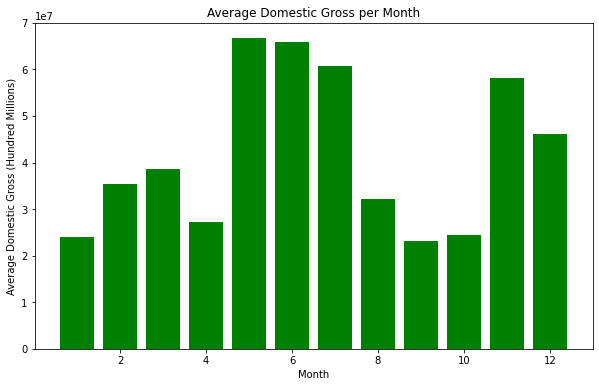

In [17]:
# comparing month released to mean gross
month_avg, ax = plt.subplots(figsize=(10,6))
x = [sorted(tnMovieBudgets['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovieBudgets['month_released'].value_counts().index))]
mean_dom_grosses = [tnMovieBudgets[tnMovieBudgets['month_released']==i]['domestic_gross'].mean() for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses, color='green')   
ax.set_title('Average Domestic Gross per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

In [88]:
# comparing mean gross without zeros
tnMovies_noz = tnMovieBudgets.replace(0, np.NaN)
tnMovies_noz

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month_released,year_released
0,1,2009-12-18,Avatar,425000000,760507625.0,2.776345e+09,12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875.0,1.045664e+09,5,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350.0,1.497624e+08,6,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868.0,1.403014e+09,5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382.0,1.316722e+09,12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,NaN,NaN,12,2018
5778,79,1999-04-02,Following,6000,48482.0,2.404950e+05,4,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338.0,1.338000e+03,7,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,NaN,NaN,9,2015


Text(0, 0.5, 'Average Domestic Gross (Hundred Millions)')

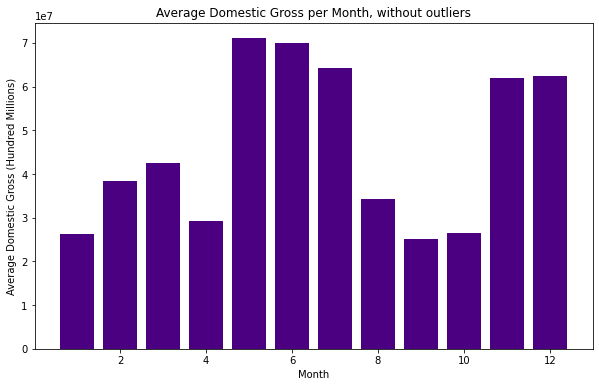

In [90]:
month_avg, ax = plt.subplots(figsize=(10,6))
x = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_gross'].mean(skipna=True) for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses1, color='indigo')   
ax.set_title('Average Domestic Gross per Month, without outliers')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

In [ ]:
# comparing month released to mean gross per genre

In [ ]:
# stacked bar plot with month released domestic and foreign gross


month_avg, ax = plt.subplots(figsize=(10,6))
x = [sorted(tnMovies_noz['month_released'].value_counts().index)[i] 
     for i in range(0, len(tnMovies_noz['month_released'].value_counts().index))]
mean_dom_grosses1 = [tnMovies_noz[tnMovies_noz['month_released']==i]['domestic_gross'].mean(skipna=True) for i in range(1,13)]                                                                                               
ax.bar(x, mean_dom_grosses1, color='orange')   
ax.set_title('Average Domestic Gross per Month, without outliers')
ax.set_xlabel('Month')
ax.set_ylabel('Average Domestic Gross (Hundred Millions)')

In [89]:
# Measure the highest differences between worldwide and domestic gross (international appeal)

In [ ]:
# percent of subscribers that watch new content provided by a streaming service